# Understanding Pandas Series and DataFrames - Lab

## Introduction

In this lab, let's get some hands-on practice working with data cleanup using Pandas.

## Objectives
You will be able to:

- Use the `.map()` and `.apply()` methods to apply a function to a pandas Series or DataFrame 
- Perform operations to change the structure of pandas DataFrames 
- Change the index of a pandas DataFrame 
- Change data types of columns in pandas DataFrames 

## Let's get started! 

Import the file `'turnstile_180901.txt'`. 

In [1]:
# Import the required libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Import the file 'turnstile_180901.txt'
df = pd.read_csv('turnstile_180901.txt')

# Print the number of rows ans columns in df
print(df.shape)

# Print the first five rows of df
df.head()

(197625, 11)


,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,00:00:00,REGULAR,6736067,2283184
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,04:00:00,REGULAR,6736087,2283188
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,08:00:00,REGULAR,6736105,2283229
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,12:00:00,REGULAR,6736180,2283314
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/25/2018,16:00:00,REGULAR,6736349,2283384


Rename all the columns to lower case: 

In [3]:
# Rename all the columns to lower case
df.columns = df.columns.str.lower()


Change the index to `'linename'`: 

In [ ]:
# Change the index to 'linename'
df = df.set_index('linename')

Reset the index: 

In [4]:
# Reset the index
df = df.reset_index()

Create another column `'Num_Lines'` that is a count of how many lines pass through a station. Then sort your DataFrame by this column in descending order. 

*Hint: According to the [data dictionary](http://web.mta.info/developers/resources/nyct/turnstile/ts_Field_Description.txt), LINENAME represents all train lines that can be boarded at a given station. Normally lines are represented by one character. For example, LINENAME 456NQR represents trains 4, 5, 6, N, Q, and R.*

In [5]:
# Add a new 'num_lines' column
df['Num_Lines'] = df['linename'].map(lambda ln: len(ln))

df.sort_values(by=['Num_Lines'], ascending=False)

,index,c/a,unit,scp,station,linename,division,date,time,desc,entries,exits,Num_Lines
132292,132292,R151,R033,00-00-00,TIMES SQ-42 ST,1237ACENQRSW,IRT,08/30/2018,00:00:00,REGULAR,1417952,3267016,12
2686,2686,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/29/2018,16:00:00,REGULAR,2836145,3311412,12
2673,2673,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,16:00:00,REGULAR,2830710,3305818,12
2674,2674,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/27/2018,20:00:00,REGULAR,2832048,3306310,12
2675,2675,A021,R032,01-00-01,TIMES SQ-42 ST,ACENQRS1237W,BMT,08/28/2018,00:00:00,REGULAR,2832325,3306433,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...
112565,112565,PTH04,R551,00-04-05,GROVE STREET,1,PTH,08/27/2018,09:28:23,REGULAR,28975,12659,1
112564,112564,PTH04,R551,00-04-05,GROVE STREET,1,PTH,08/27/2018,05:16:23,REGULAR,28319,12541,1
112563,112563,PTH04,R551,00-04-05,GROVE STREET,1,PTH,08/27/2018,01:04:23,REGULAR,28318,12541,1
112562,112562,PTH04,R551,00-04-05,GROVE STREET,1,PTH,08/26/2018,20:52:23,REGULAR,28305,12531,1


Write a function to clean column names: 

In [8]:
def clean(col_name):
    cleaned = col_name.str.strip()
    return cleaned

In [31]:
# Use the above function to clean the column names
df.columns = clean(df.columns)

In [32]:
# Check to ensure the column names were cleaned
df.columns

Index(['index', 'c/a', 'unit', 'scp', 'station', 'linename', 'division',
       'date', 'time', 'desc', 'entries', 'exits', 'Num_Lines', 'day_of_week'],
      dtype='object')

- Change the data type of the `'date'` column to a date 
- Add a new column `'day_of_week'` that represents the day of the week

In [34]:
# Convert the data type of the 'date' column to a date
df['date'] = pd.to_datetime(df['date'])

# Add a new column 'day_of_week' that represents the day of the week 
df['day_of_week'] = df['date'].dt.dayofweek

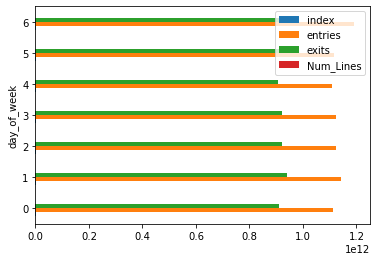

In [35]:
# Group the data by day of week and plot the sum of the numeric columns
grouped = df.groupby('day_of_week').sum()
grouped.plot(kind='barh')
plt.show()

- Remove the index of `grouped` 
- Print the first five rows of `grouped` 

In [36]:
grouped

,index,entries,exits,Num_Lines
day_of_week,,,,
0,2783610827,1114237052454,911938153513,76110
1,2833413973,1143313287046,942230721477,77303
2,2781528032,1123655222441,920630864687,75713
3,2817391725,1122723988662,920691927110,76607
4,2778112001,1110224700078,906799065337,75573
5,2741377942,1115661545514,909142081474,74725
6,2792287000,1192306179082,959223750461,75306


In [37]:
# Reset the index of grouped
grouped = grouped.reset_index()

# Print the first five rows of grouped
grouped.head()

,day_of_week,index,entries,exits,Num_Lines
0,0,2783610827,1114237052454,911938153513,76110
1,1,2833413973,1143313287046,942230721477,77303
2,2,2781528032,1123655222441,920630864687,75713
3,3,2817391725,1122723988662,920691927110,76607
4,4,2778112001,1110224700078,906799065337,75573


Add a new column `'is_weekend'` that maps the `'day_of_week'` column using the dictionary `weekend_map` 

In [38]:
# Use this dictionary to create a new column 
weekend_map = {0:False, 1:False, 2:False, 3:False, 4:False, 5:True, 6:True}

# Add a new column 'is_weekend' that maps the 'day_of_week' column using weekend_map
grouped['is_weekend'] = grouped['day_of_week'].map(weekend_map)
grouped

,day_of_week,index,entries,exits,Num_Lines,is_weekend
0,0,2783610827,1114237052454,911938153513,76110,False
1,1,2833413973,1143313287046,942230721477,77303,False
2,2,2781528032,1123655222441,920630864687,75713,False
3,3,2817391725,1122723988662,920691927110,76607,False
4,4,2778112001,1110224700078,906799065337,75573,False
5,5,2741377942,1115661545514,909142081474,74725,True
6,6,2792287000,1192306179082,959223750461,75306,True


In [43]:
# Group the data by weekend/weekday and plot the sum of the numeric columns
wkend = grouped.groupby('is_weekend').sum()
wkend


,day_of_week,index,entries,exits,Num_Lines
is_weekend,,,,,
False,10,13994056558,5614154250681,4602290732124,381306
True,11,5533664942,2307967724596,1868365831935,150031


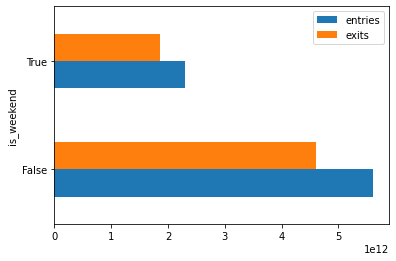

In [40]:
wkend[['entries', 'exits']].plot(kind='barh')
plt.show()

Remove the `'c/a'` and `'scp'` columns. 

In [42]:
# Remove the 'c/a' and 'scp' columns
df = df.drop(['c/a', 'scp'],1)
df.head(2)

,index,unit,station,linename,division,date,time,desc,entries,exits,Num_Lines,day_of_week
0,0,R051,59 ST,NQR456W,BMT,2018-08-25,00:00:00,REGULAR,6736067,2283184,7,5
1,1,R051,59 ST,NQR456W,BMT,2018-08-25,04:00:00,REGULAR,6736087,2283188,7,5


## Analysis Question 

What is misleading about the day of week and weekend/weekday charts you just plotted?

In [ ]:
# You are comparing cumulative data from two days in the weekend
# with five days in the week
# the chart gives the misleading impression that weekends are quieter
# a more meaningful plot would be using mean when grouping the data
# or comparing business of different times or stations

<function matplotlib.pyplot.show(close=None, block=None)>

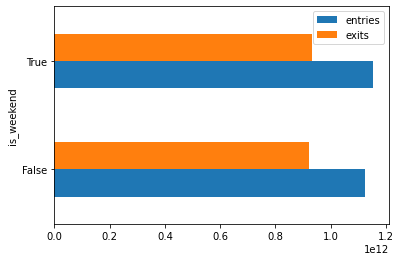

In [47]:
wkend_m = grouped.groupby('is_weekend').mean()
wkend_m[['entries', 'exits']].plot(kind='barh')
plt.show

## Summary

Great! You practiced your data cleanup skills using Pandas.